UnderStand the Data

In [4]:
import pandas as pd

#Load the Data sets

day_df=pd.read_csv('day.csv')
hour_df=pd.read_csv('hour.csv')

# Display the First Few Rows

print(day_df.head())
print(hour_df.head())

#shape,Data Type and Structures
print(day_df.info())
print(day_df.describe())
print(hour_df.info())
print(hour_df.describe())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
   instant      dteday  se

Checking for Missing Values

In [5]:
#check for missing Values
missing_values_day=day_df.isnull().sum()
missing_values_hour=hour_df.isnull().sum()

missing_values_day,missing_values_hour

(instant       0
 dteday        0
 season        0
 yr            0
 mnth          0
 holiday       0
 weekday       0
 workingday    0
 weathersit    0
 temp          0
 atemp         0
 hum           0
 windspeed     0
 casual        0
 registered    0
 cnt           0
 dtype: int64,
 instant       0
 dteday        0
 season        0
 yr            0
 mnth          0
 hr            0
 holiday       0
 weekday       0
 workingday    0
 weathersit    0
 temp          0
 atemp         0
 hum           0
 windspeed     0
 casual        0
 registered    0
 cnt           0
 dtype: int64)

There are no missing Values

In [6]:

# The 'hour.csv' dataset provides hourly data, while 'day.csv' provides daily summaries.
# To merge them, we first need to aggregate the hourly data to a daily level so that we have one row per date in both datasets.

# Aggregating hourly data to daily level using groupby and aggregate functions.
daily_aggregated = hour_df.groupby('dteday').agg({
    'season': 'first',       # Taking the first value for categorical columns
    'yr': 'first',
    'mnth': 'first',
    'holiday': 'first',
    'weekday': 'first',
    'workingday': 'first',
    'weathersit': 'first',
    'temp': 'mean',          # Taking the mean for continuous columns
    'atemp': 'mean',
    'hum': 'mean',
    'windspeed': 'mean',
    'casual': 'sum',         # Summing up the counts for casual, registered, and total bike rentals
    'registered': 'sum',
    'cnt': 'sum'
}).reset_index()

# Merging the aggregated data with day.csv on 'dteday' column. 
# The suffixes '_day' and '_hour' are added to distinguish between columns from the two datasets.
merged_df = pd.merge(day_df, daily_aggregated, on='dteday', suffixes=('_day', '_hour'))


In [9]:
rint(merged_df.head())

   instant      dteday  season_day  yr_day  mnth_day  holiday_day  \
0        1  2011-01-01           1       0         1            0   
1        2  2011-01-02           1       0         1            0   
2        3  2011-01-03           1       0         1            0   
3        4  2011-01-04           1       0         1            0   
4        5  2011-01-05           1       0         1            0   

   weekday_day  workingday_day  weathersit_day  temp_day  ...  weekday_hour  \
0            6               0               2  0.344167  ...             6   
1            0               0               2  0.363478  ...             0   
2            1               1               1  0.196364  ...             1   
3            2               1               1  0.200000  ...             2   
4            3               1               1  0.226957  ...             3   

   workingday_hour  weathersit_hour  temp_hour  atemp_hour  hum_hour  \
0                0                1   

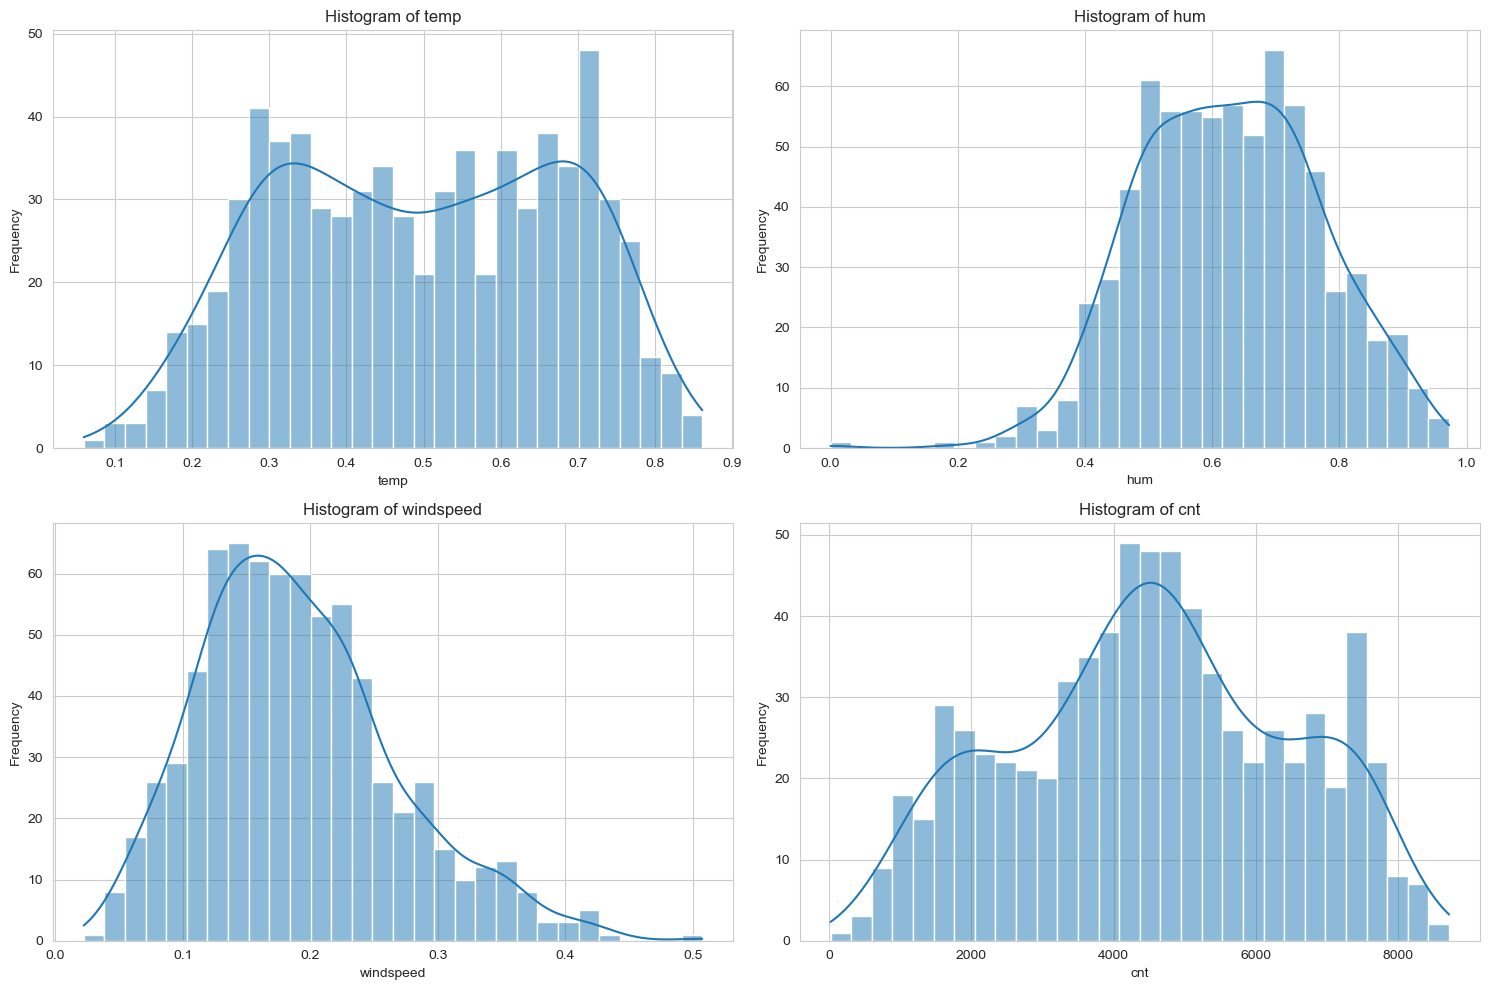

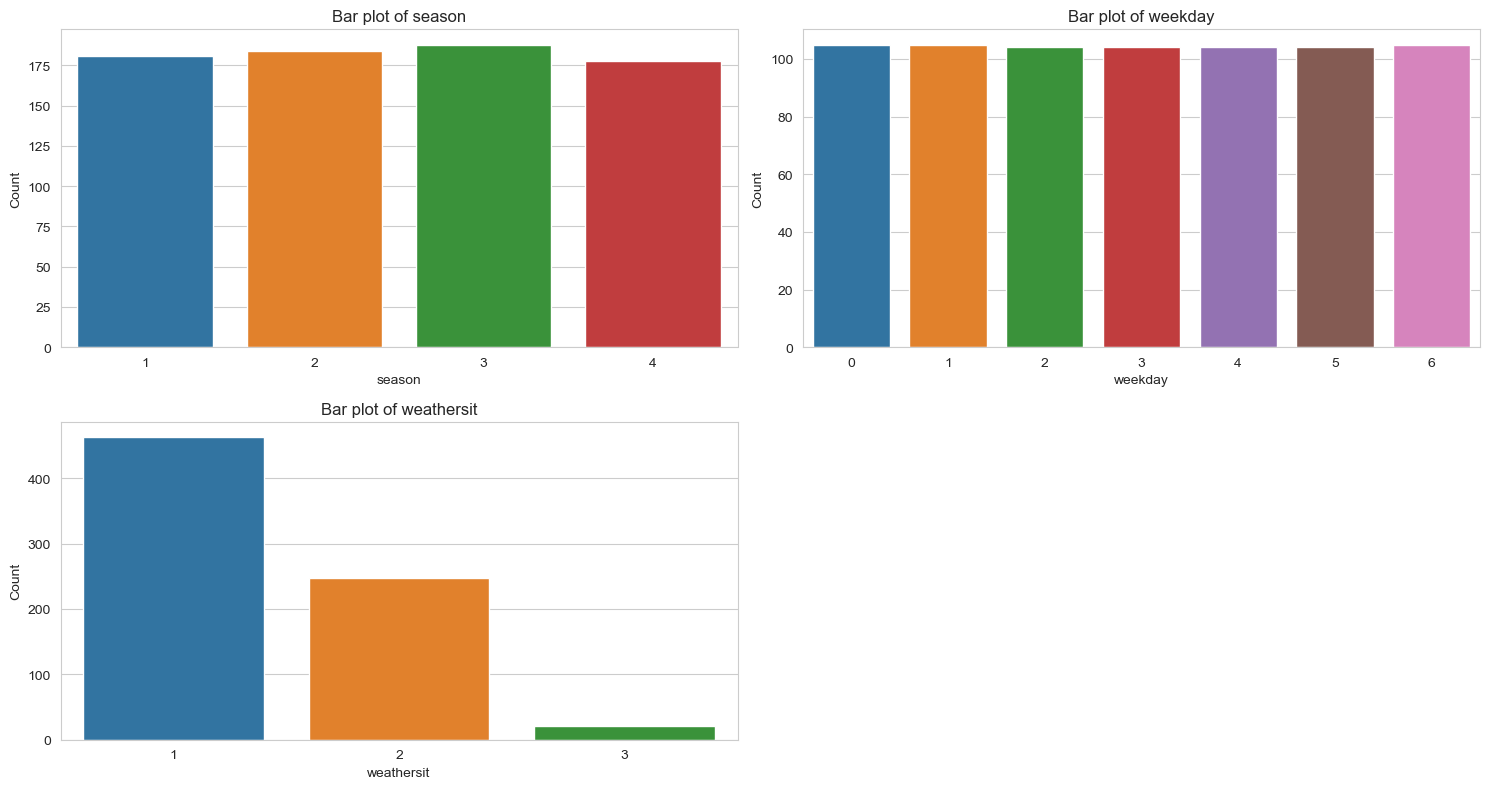

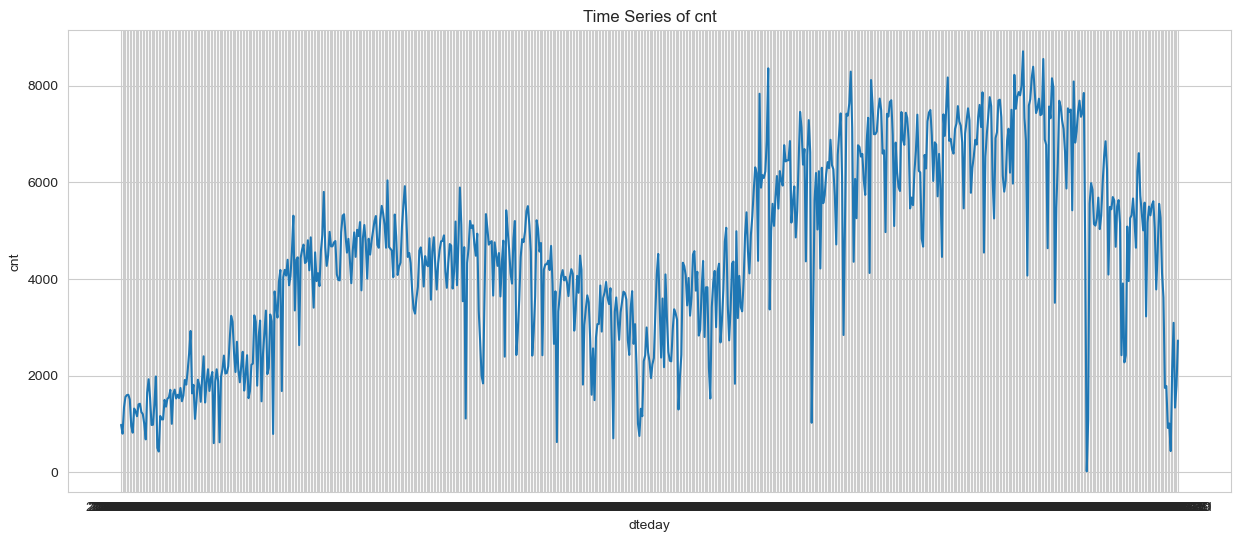

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")

def plot_histograms(df, columns):
    """Plot histograms for given columns."""
    plt.figure(figsize=(15, 10))
    for i, col in enumerate(columns, 1):
        plt.subplot(2, 2, i)
        sns.histplot(df[col], kde=True, bins=30)
        plt.title(f'Histogram of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

def plot_barplots(df, columns):
    """Plot bar plots for given columns."""
    plt.figure(figsize=(15, 8))
    for i, col in enumerate(columns, 1):
        plt.subplot(2, 2, i)
        sns.countplot(data=df, x=col)
        plt.title(f'Bar plot of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

def plot_time_series(df, x_col, y_col):
    """Plot time series data."""
    plt.figure(figsize=(15, 6))
    sns.lineplot(data=df, x=x_col, y=y_col)
    plt.title(f'Time Series of {y_col}')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.show()

# Plot histograms for continuous variables
plot_histograms(day_df, ['temp', 'hum', 'windspeed', 'cnt'])

# Plot bar plots for categorical variables
plot_barplots(day_df, ['season', 'weekday', 'weathersit'])

# Plot time series for daily bike rentals
plot_time_series(day_df, 'dteday', 'cnt')


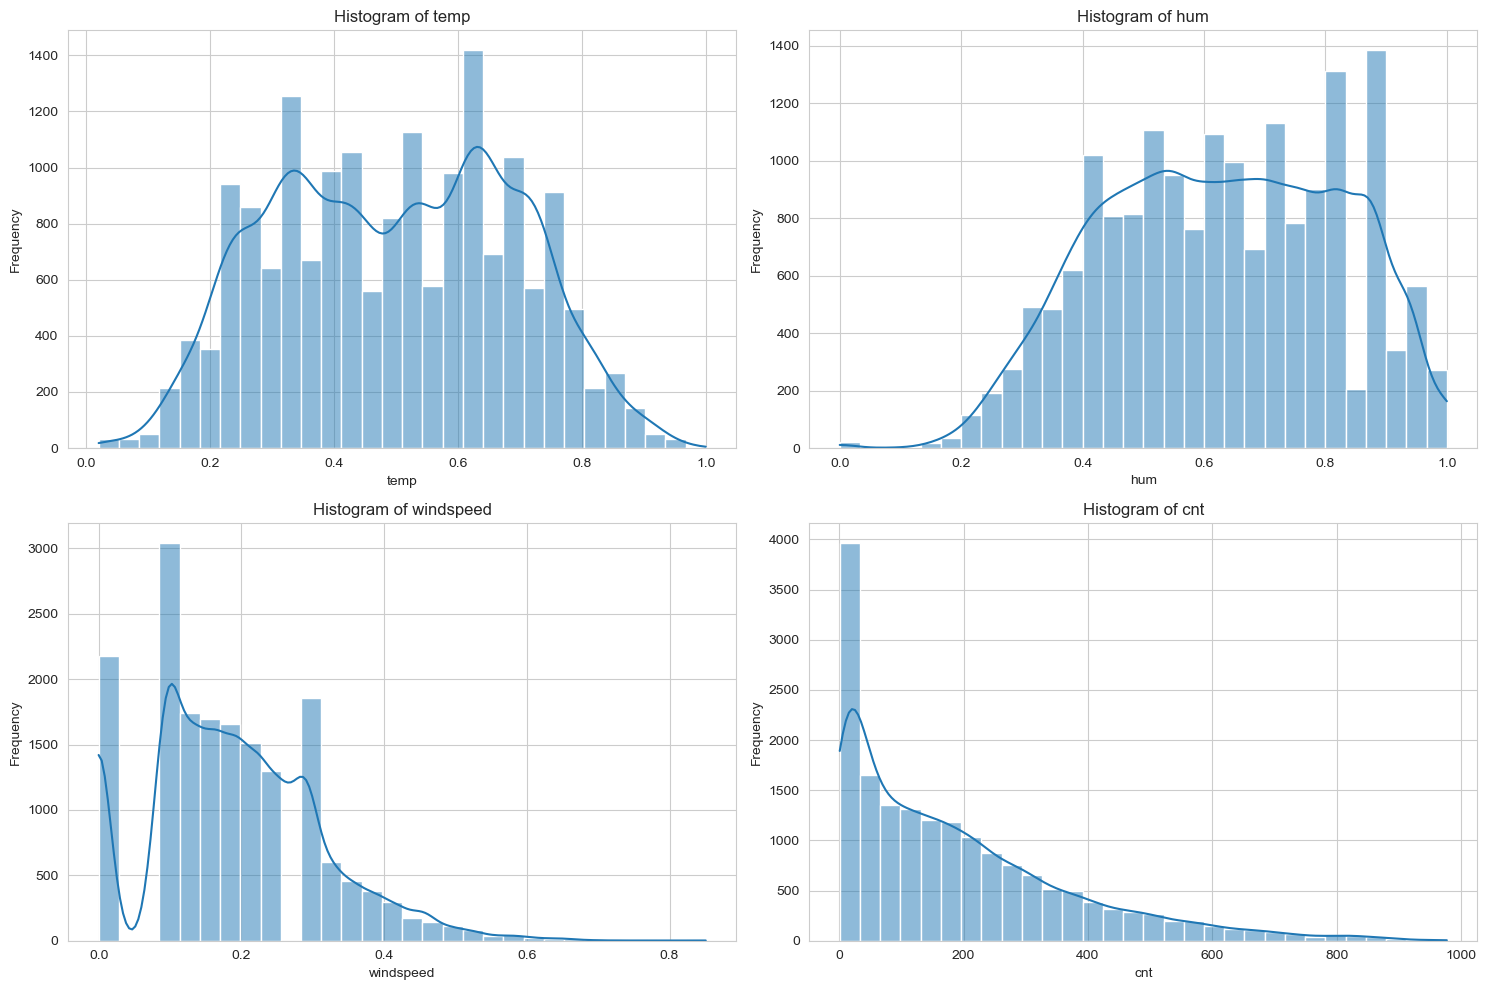

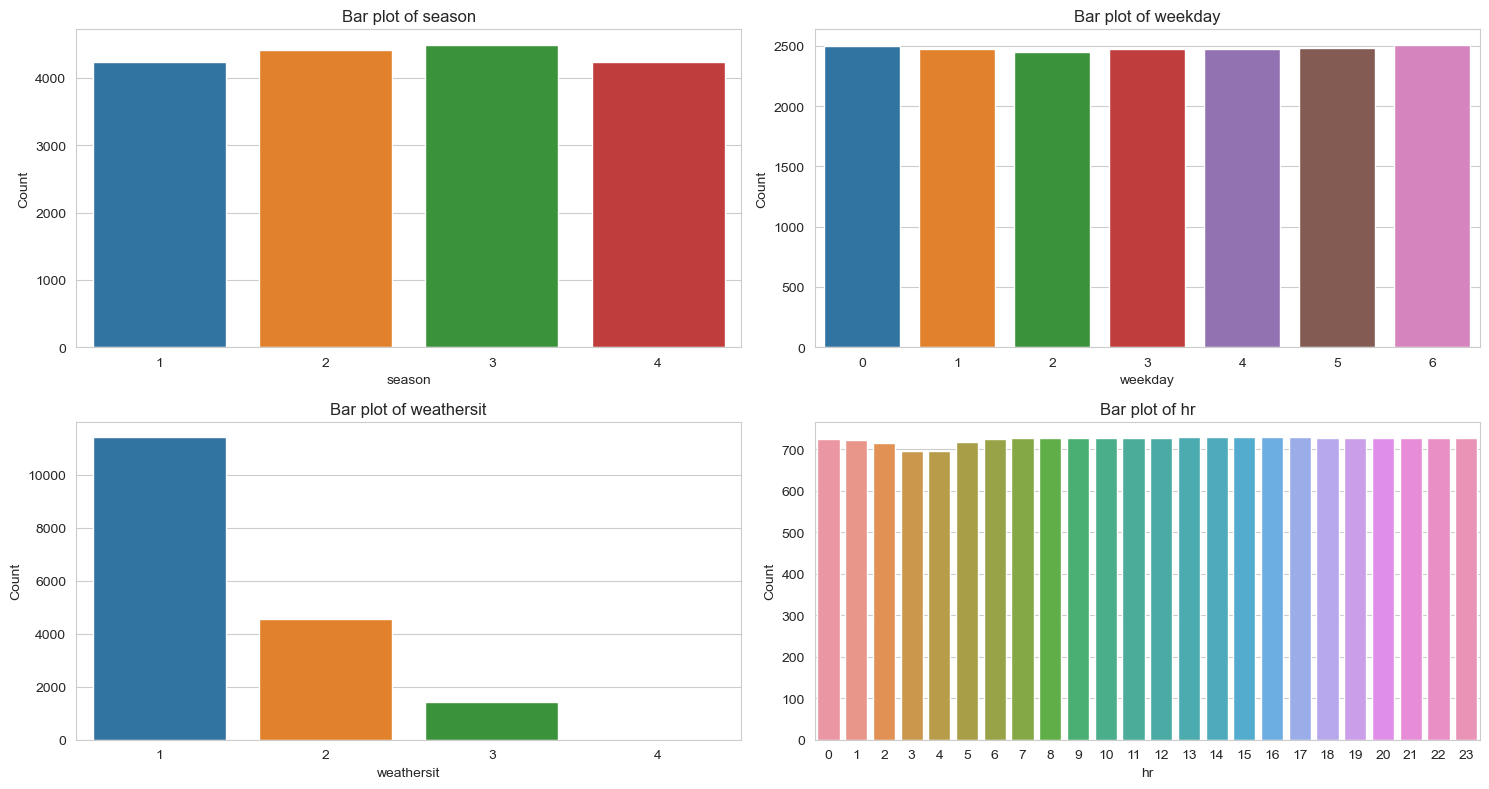

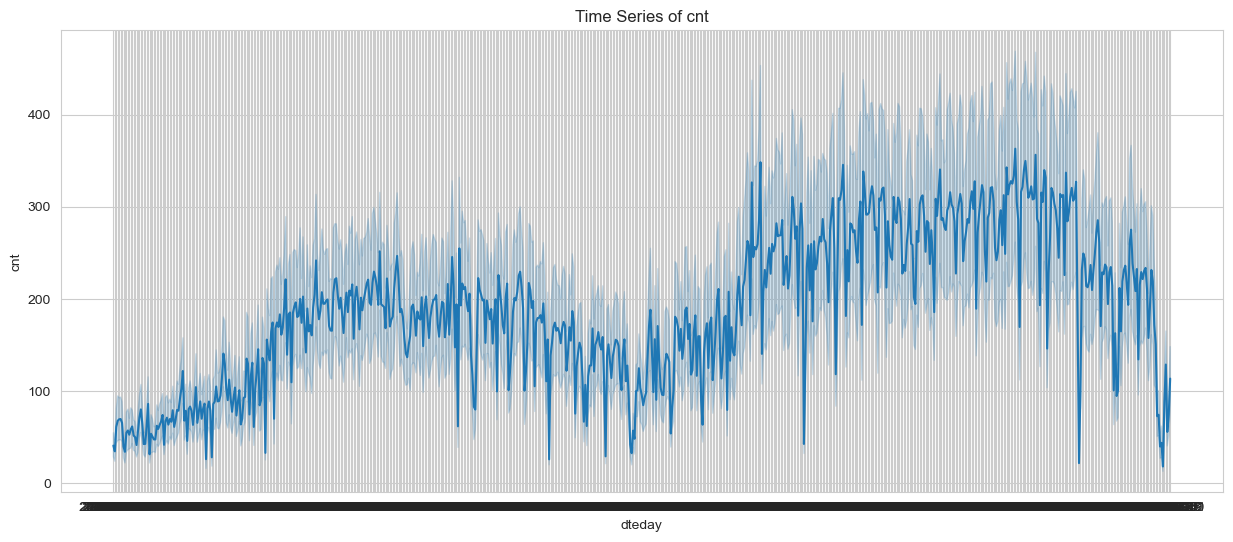

In [11]:
# Plot histograms for continuous variables from hour.csv
plot_histograms(hour_df, ['temp', 'hum', 'windspeed', 'cnt'])

# Plot bar plots for categorical variables from hour.csv
plot_barplots(hour_df, ['season', 'weekday', 'weathersit', 'hr'])

# Plot time series for hourly bike rentals. 
# Given the larger number of data points, it might be beneficial to take a sample or aggregate to daily counts.
plot_time_series(hour_df, 'dteday', 'cnt')


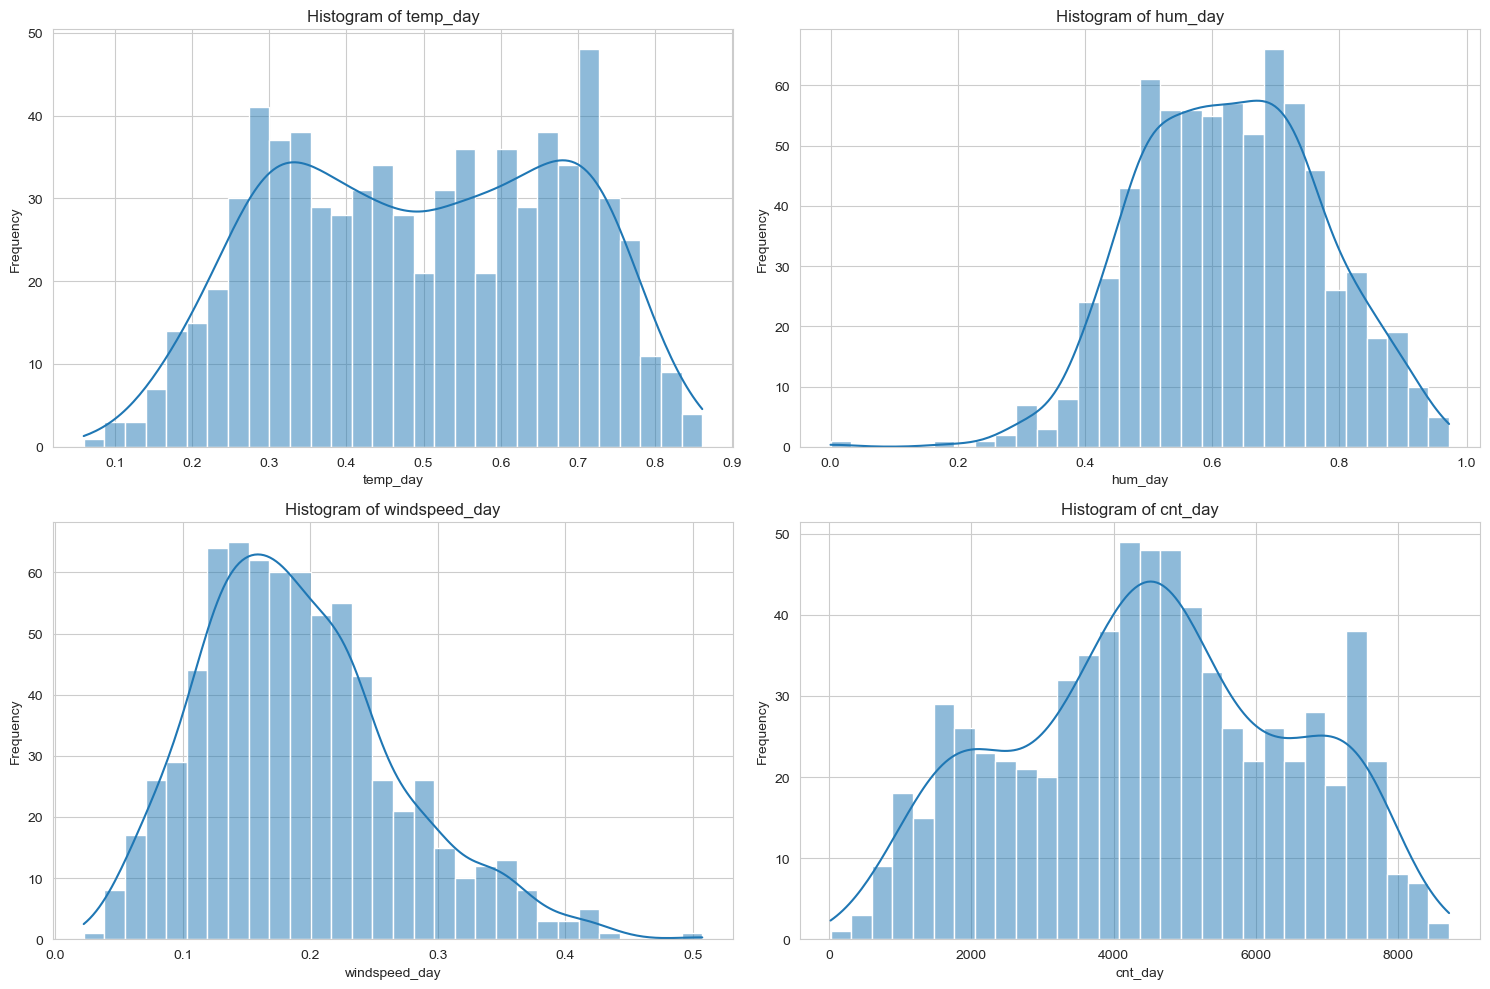

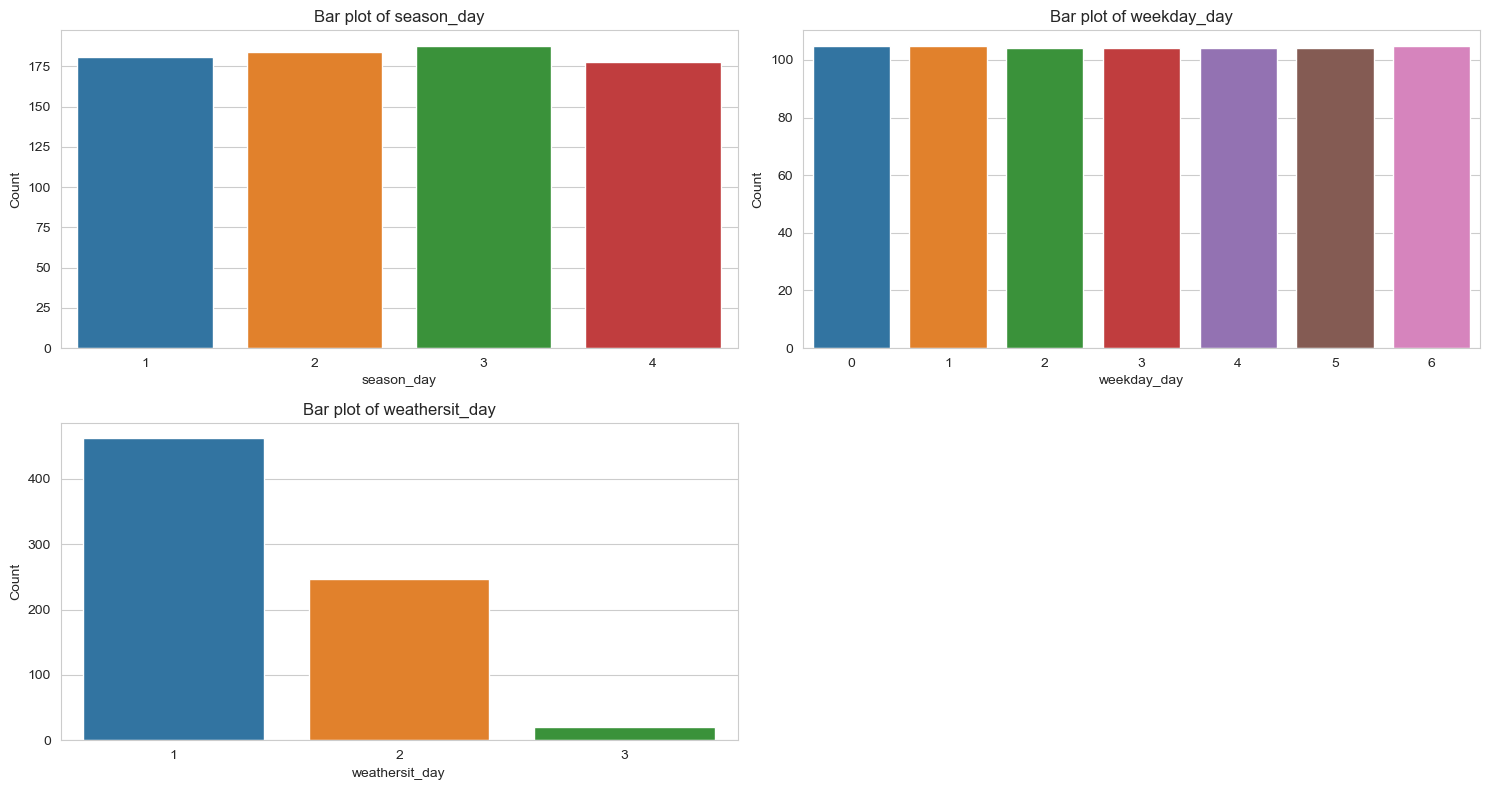

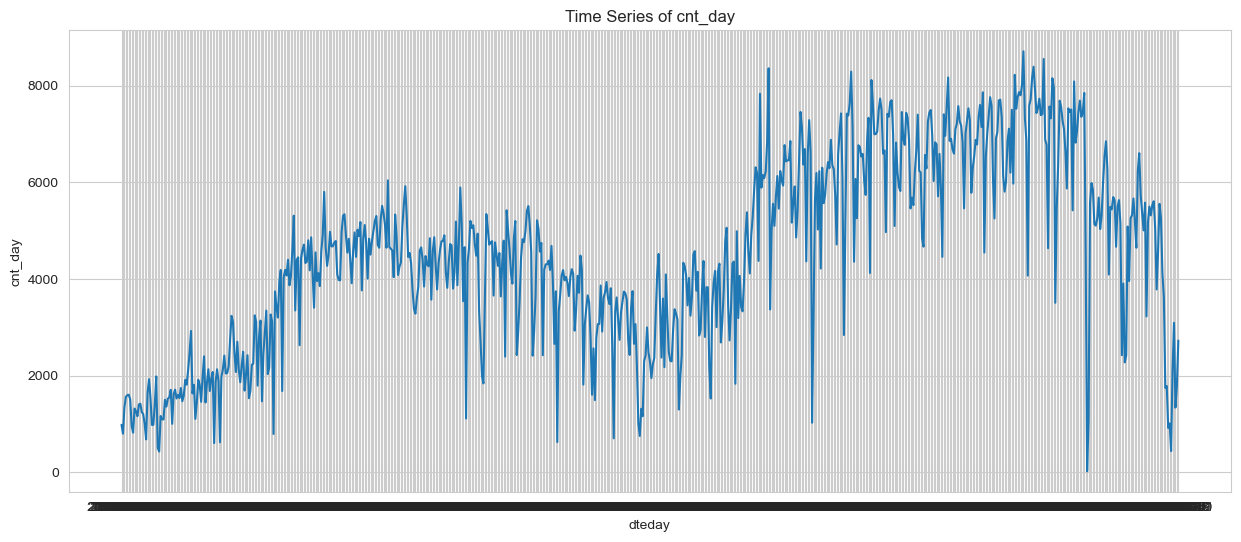

In [12]:
# Plot histograms for continuous variables from the merged dataset
plot_histograms(merged_df, ['temp_day', 'hum_day', 'windspeed_day', 'cnt_day'])

# Plot bar plots for categorical variables from the merged dataset
plot_barplots(merged_df, ['season_day', 'weekday_day', 'weathersit_day'])

# Plot time series for daily bike rentals from the merged dataset
plot_time_series(merged_df, 'dteday', 'cnt_day')


# Insights from day.csv

Insights from day.csv:
Temperature (temp): The distribution appears approximately normal, with most days having a moderate temperature.

Humidity (hum): The distribution has peaks at both lower and higher humidity levels, but there are fewer days with mid-range humidity.

Windspeed: Most days have lower windspeeds, with fewer days experiencing higher winds.

Bike Rentals (cnt): The distribution is right-skewed, indicating that there are more days with lower bike rentals and fewer days with extremely high rentals.

Season, Weekday, Weathersit: The distribution across different seasons, weekdays, and weather situations appears reasonably balanced.

Time Series: There's a clear upward trend in bike rentals over time, indicating increased popularity or growth in the service.

# Insights from hour.csv

Insights from hour.csv:
Temperature, Humidity, Windspeed: The distributions are similar to the day.csv dataset but with more granularity.

Bike Rentals (cnt): The hourly distribution is also right-skewed, with many hours having low rentals, especially during the night.

Hour: As expected, bike rentals peak during morning and evening rush hours.

Season, Weekday, Weathersit: The distribution is similar to the daily data but with added detail for each hour.

# Insights from Merged.csv

The insights are very similar to those from the day.csv dataset since the merged data retains daily granularity. The added columns from the hour.csv dataset (with the _hour suffix) can provide a comparison between the original daily summaries and the aggregated hourly data.

# Data Cleaning

#  Outliers

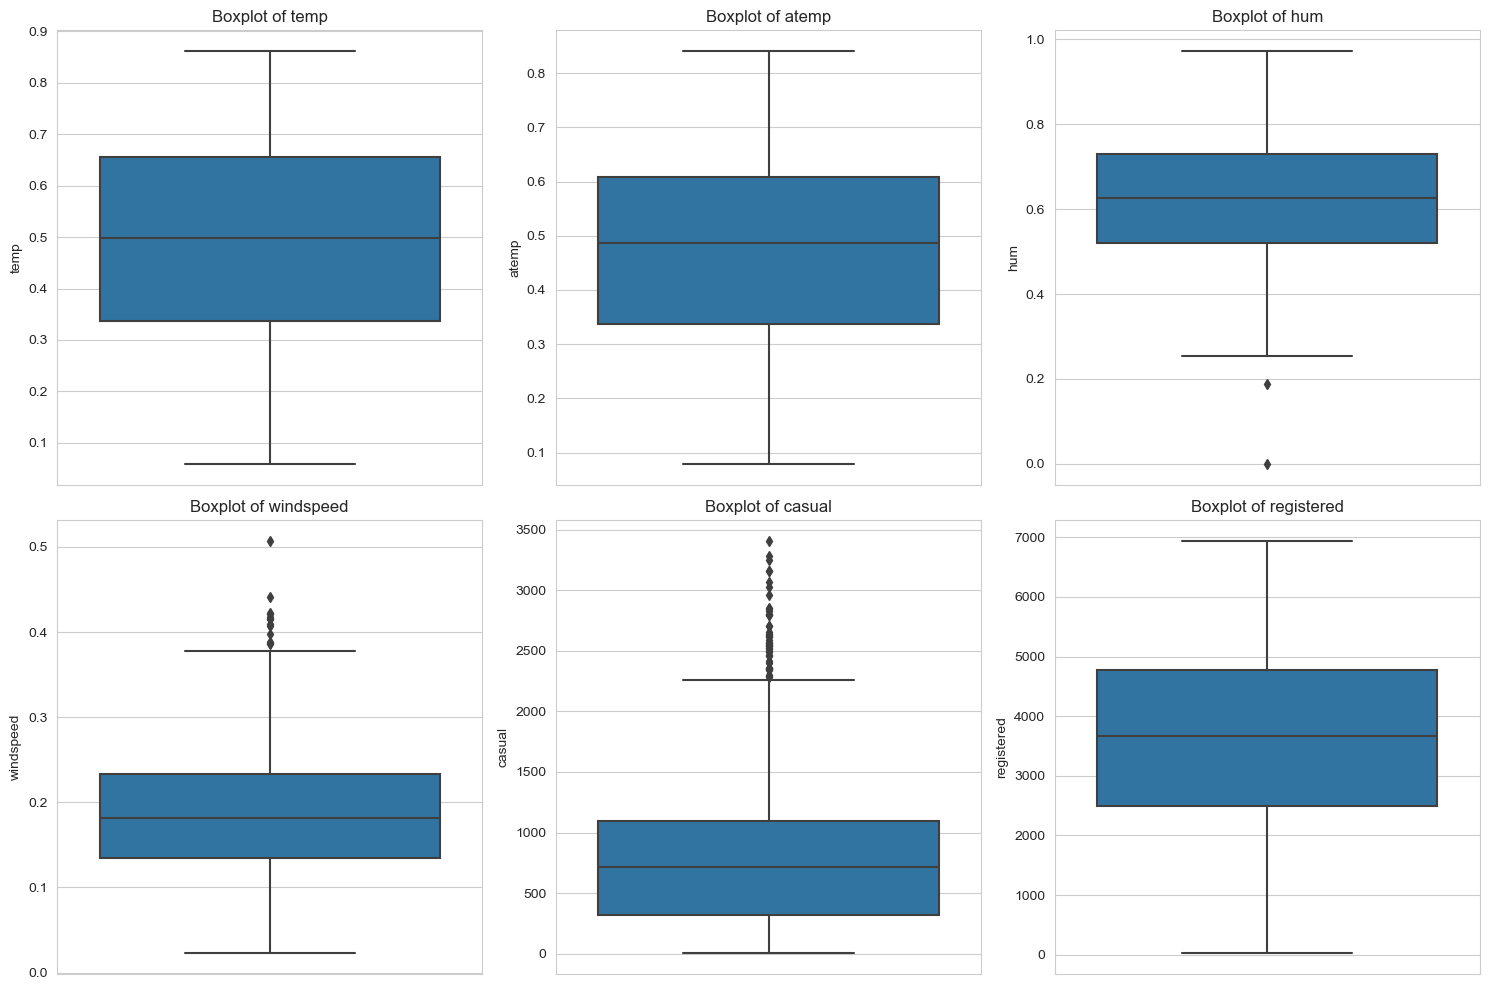

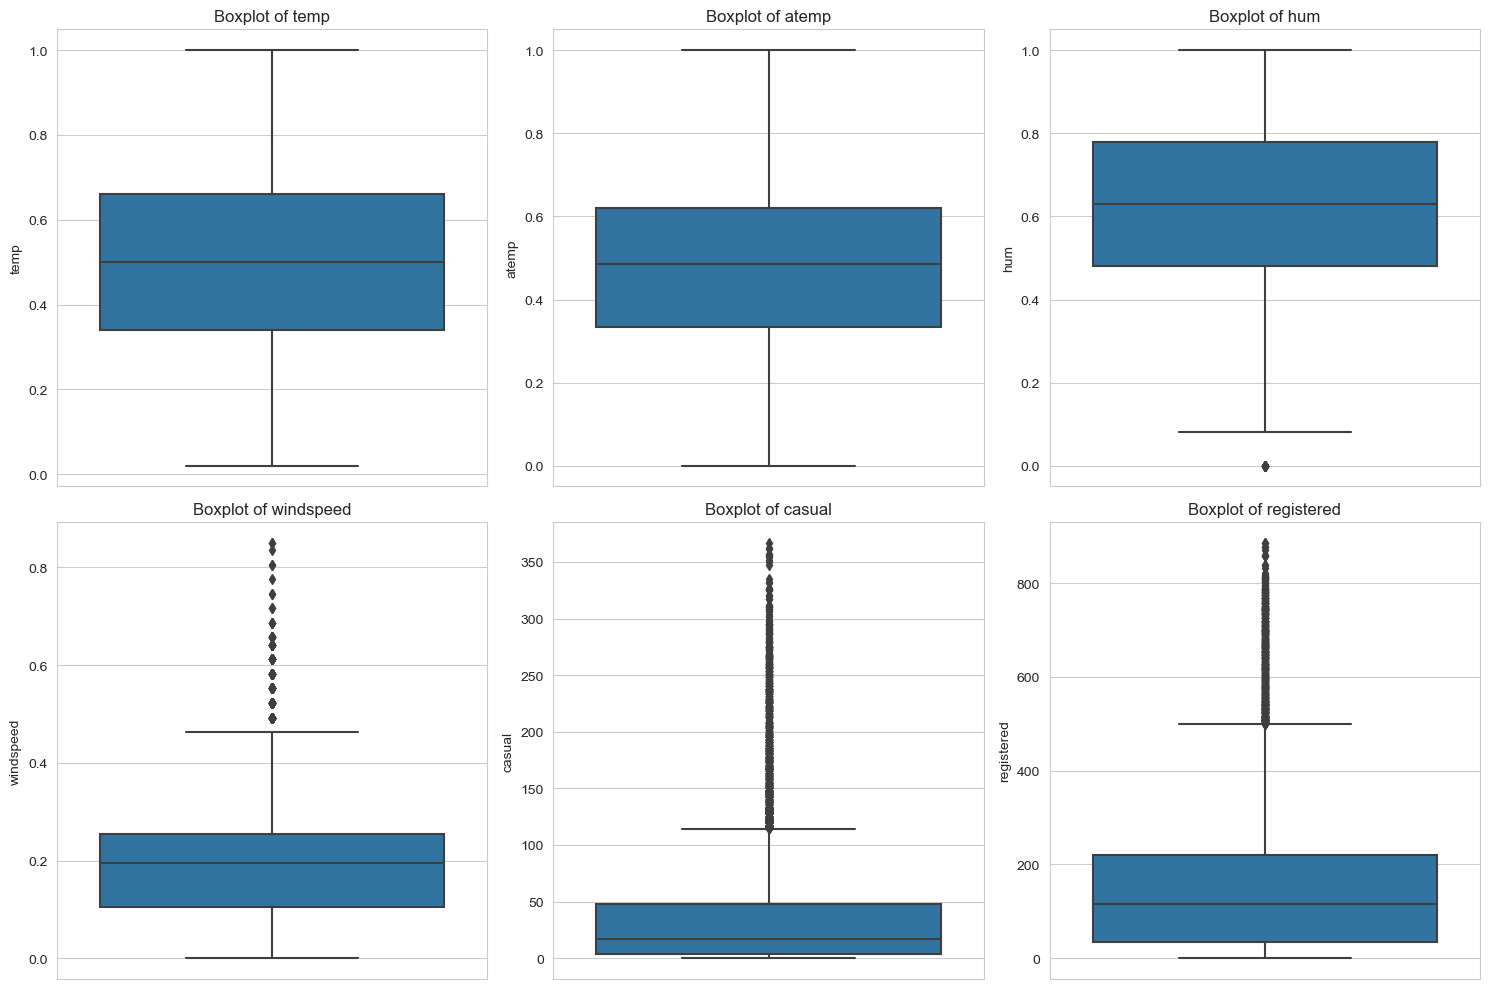

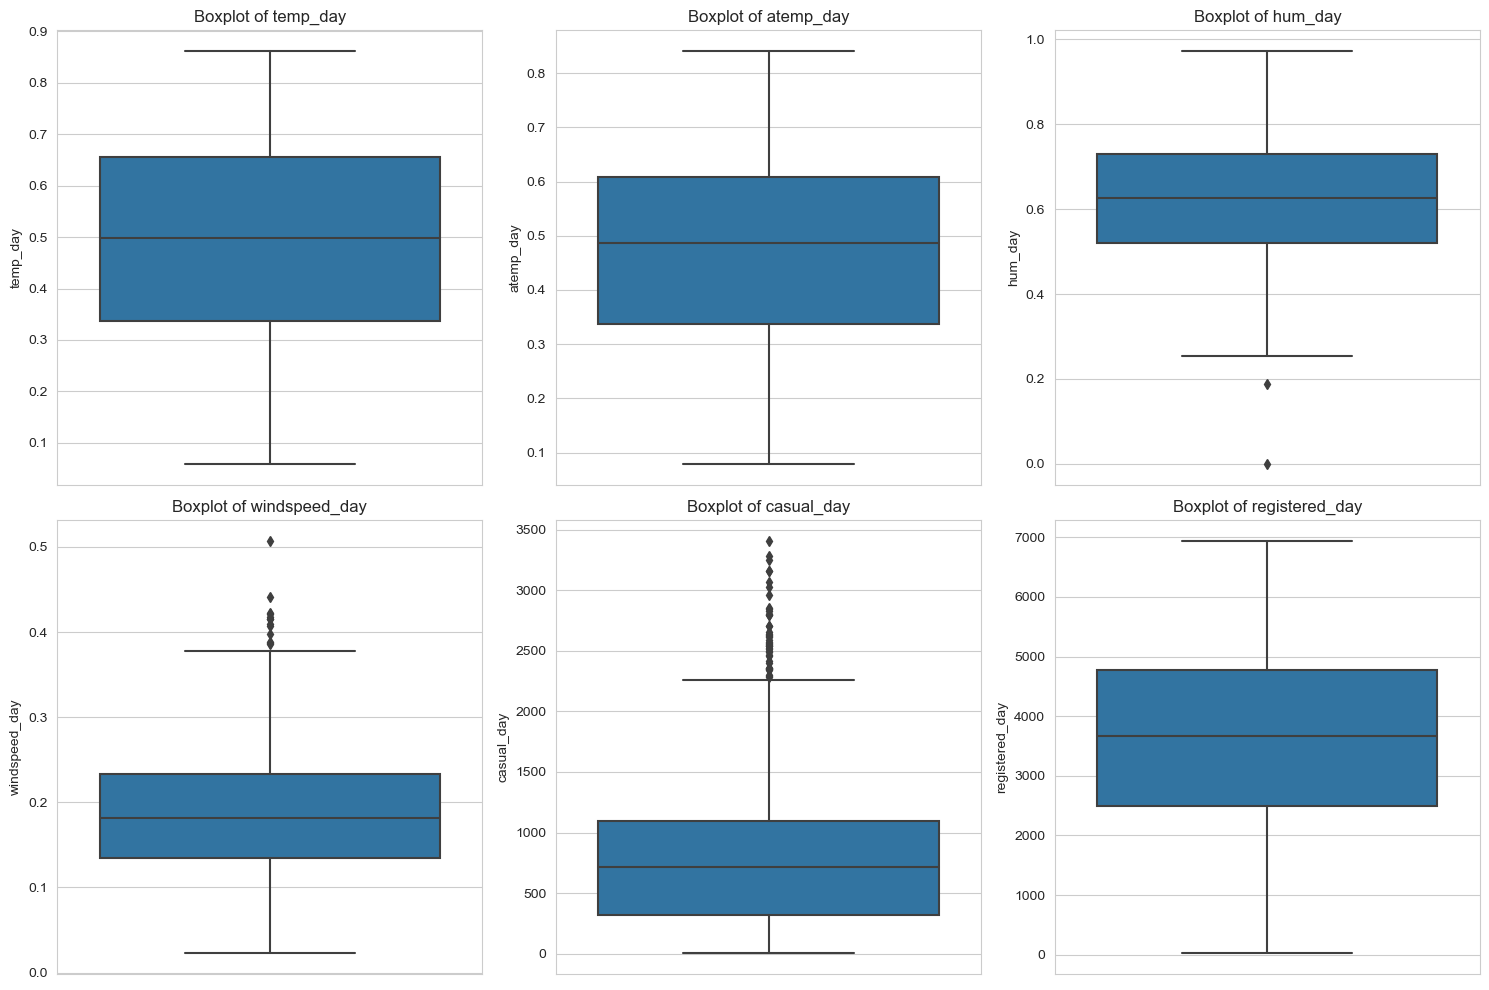

In [13]:

# Function to plot boxplots for potential outliers
def plot_boxplots(df, columns):
    plt.figure(figsize=(15, 10))
    for i, col in enumerate(columns, 1):
        plt.subplot(2, 3, i)
        sns.boxplot(y=df[col])
        plt.title(f'Boxplot of {col}')
        plt.tight_layout()
    plt.show()

# Continuous columns for visualization
continuous_columns_day = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered']
continuous_columns_hour = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered']
continuous_columns_merged = ['temp_day', 'atemp_day', 'hum_day', 'windspeed_day', 'casual_day', 'registered_day']

# Plot boxplots for continuous variables in day.csv
plot_boxplots(day_df, continuous_columns_day)

# Plot boxplots for continuous variables in hour.csv
plot_boxplots(hour_df, continuous_columns_hour)

# Plot boxplots for continuous variables in the merged dataset
plot_boxplots(merged_df, continuous_columns_merged)


# Insights

# Handling Outliers:

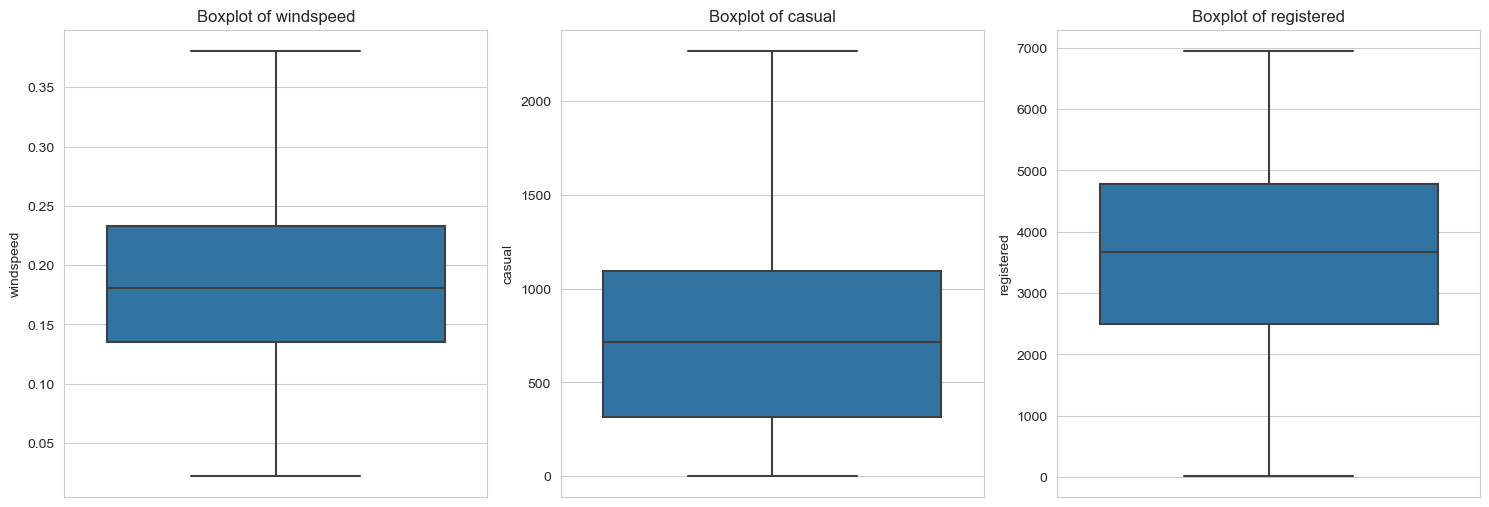

In [16]:
def cap_outliers_using_iqr(df, column):
    """Cap outliers of a column using the IQR method."""
    # Calculate Q1, Q3 and IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap the outliers
    df[column] = df[column].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))
    return df

# Handle outliers for the mentioned columns
columns_to_handle = ['windspeed', 'casual', 'registered']
for col in columns_to_handle:
    day_df = cap_outliers_using_iqr(day_df, col)

# Visualize the columns again to check the effect of capping
plot_boxplots(day_df, columns_to_handle)


The outliers for windspeed, casual, and registered columns in the day.csv dataset have been capped using the IQR method. As seen in the updated box plots, the extreme values have been adjusted to fall within the acceptable range defined by the IQR method.

# Feature Engineering

In [17]:
# 1. For Rush Hour in hour.csv dataset
hour_df['rush_hour'] = hour_df['hr'].apply(lambda x: 1 if (6 <= x <= 9) or (16 <= x <= 19) else 0)

# 2. For Day Type in day.csv and merged dataset
def get_day_type(row):
    if row['holiday'] == 1:
        return 'Holiday'
    elif row['workingday'] == 1:
        return 'Working Day'
    else:
        return 'Weekend'

day_df['day_type'] = day_df.apply(get_day_type, axis=1)

def get_day_type_merged(row):
    if row['holiday_day'] == 1:
        return 'Holiday'
    elif row['workingday_day'] == 1:
        return 'Working Day'
    else:
        return 'Weekend'

merged_df['day_type'] = merged_df.apply(get_day_type_merged, axis=1)


Unused Features

In [18]:
# Dropping 'atemp' from day.csv, hour.csv, and merged dataset as it's correlated with 'temp'
day_df.drop('atemp', axis=1, inplace=True)
hour_df.drop('atemp', axis=1, inplace=True)
merged_df.drop(['atemp_day', 'atemp_hour'], axis=1, inplace=True)


In [19]:
# Data Types
# Converting 'dteday' to datetime type
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
merged_df['dteday'] = pd.to_datetime(merged_df['dteday'])

# Converting categorical variables to 'category' type
categorical_cols_day = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'day_type']
categorical_cols_hour = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'rush_hour']
categorical_cols_merged = ['season_day', 'yr_day', 'mnth_day', 'holiday_day', 'weekday_day', 'workingday_day', 
                           'weathersit_day', 'day_type']

for col in categorical_cols_day:
    day_df[col] = day_df[col].astype('category')

for col in categorical_cols_hour:
    hour_df[col] = hour_df[col].astype('category')

for col in categorical_cols_merged:
    merged_df[col] = merged_df[col].astype('category')

day_df.dtypes, hour_df.dtypes, merged_df.dtypes

(instant                int64
 dteday        datetime64[ns]
 season              category
 yr                  category
 mnth                category
 holiday             category
 weekday             category
 workingday          category
 weathersit          category
 temp                 float64
 hum                  float64
 windspeed            float64
 casual               float64
 registered             int64
 cnt                    int64
 day_type            category
 dtype: object,
 instant                int64
 dteday        datetime64[ns]
 season              category
 yr                  category
 mnth                category
 hr                     int64
 holiday             category
 weekday             category
 workingday          category
 weathersit          category
 temp                 float64
 hum                  float64
 windspeed            float64
 casual                 int64
 registered             int64
 cnt                    int64
 rush_hour           cat